<a href="https://colab.research.google.com/github/EIAmaury24/AI-Course/blob/main/Miquel_Amaury_RL_semi_conducteurs_Exercice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from collections import deque
import matplotlib.pyplot as plt

# **Exercice 2 : Reinforcement learning dans une grille 5×5**

## **Descriprion**
Un agent se déplace dans une grille de 5×5 cases en partant de la position (0,0) et doit atteindre un objectif situé à (4,4). À chaque étape, l'agent peut choisir l'une des quatre actions possibles :


1.  Haut (U).
2.  Bas (D).
3.  Gauche (L).
4.  Droite (R)

L'agent reçoit une récompense de +1 lorsqu'il atteint la cible et une récompense de -1 à chaque autre étape. S'il tente de sortir des limites de la grille, il reste sur place. L'objectif est d'entraîner un agent utilisant l'algorithme REINFORCE pour apprendre la meilleure politique de déplacement vers la cible en minimisant le nombre d'étapes.

# **Questions**

### **Compréhension de l’environnement**
1.   Quels sont les états possibles ($s_{t}$) de l’agent dans cet environnement ?
2.   Quelles sont les actions ($a_{t}$) que l’agent peut effectuer et comment influencent-elles son état ?
3.   Comment la fonction de récompense ($R_{t}$) est-elle définie et quel est son impact sur l’apprentissage ?

### **Implémentation avec REINFORCE**
1.   Comment représenter l’agent sous forme d’un réseau de neurones pour approximer la politique ?
2.   Quel est le rôle de la politique stochastique dans l’algorithme REINFORCE
3.   Comment la mise à jour des poids du réseau de neurones est-elle effectuée à partir des épisodes joués ?

### **Expérimentation et analyse**
1.   Après l'entraînement, comment pouvez-vous évaluer si l'agent a bien appris à atteindre la cible efficacement ?
2.   Que se passe-t-il si la grille devient plus grande (par exemple, 10×10) ? Quels ajustements seraient nécessaires dans l’apprentissage ?

# **Réponses**
### **Compréhension de l’environnement**
1. Les états possibles ($s_{t}$) de l’agent dans cet environnement sont l'ensemble des coordonnées de la grille (5*5).

2.   L'agent peut effectuer quatre actions:
  1.  Haut (U).
  2.  Bas (D).
  3.  Gauche (L).
  4.  Droite (R)

Chaque action modifie une des coordonées de son état

3.  La fonction de récompense ($R_{t}$) est-elle définie par une récompense de +1 lorsqu'il atteint la cible et une récompense de -1 à chaque autre étape. L'objectif sera donc maximiser cette récompense en atteignant la cible finale avec le moins de déplacement possible.


### **Implémentation avec REINFORCE**
1.   Comment représenter l’agent sous forme d’un réseau de neurones pour approximer la politique ?
Nous pouvons mettre en place un Réseaux de neuronnes avec plusieurs couche Dense:


    Input: input_size=2
    Dense: h_size=128, activation_function=Relu
    Dense: o_size=4,activation_function=Softmax

2.   Dans un politique stochastique, l'agent va choisir une action parmi une distribution de probabilité. Cette distribution permet ainsi de favoriser l'exploration notamment utile dans la résolution d'un labyrinthe. Cette olitique permet donc d'effectuer un maximum de recherche avant de converger vers la solution optimale.


3.   A chaque fin d'épisods, nous calculons le return qui est la somme de toutes les rewards pendant l'épisode. Puis nous calculons le gradient du return attendu. Le gradient réprésente la direction à prendre pour atteindre le maximum. Ce gradient nous permet ainsi d'ajuster les poids en fontion du learning rate.


    weight=weight+gradient*learning_rate

### **Expérimentation et analyse**
1.   Après l'entrainement, nous pouvons vérifier l'apprentissage de l'agent en traçant sa trajectoire dans la grille afin de vérifier son efficacité. Nous pouvons aussi calculer le return de sa trajectoire afin de la comparer à celle optimale du labyrinthe.

2.   Dans le cas où la grille serait plus grande, il faudrait rajouter des couches de neuronnes dans le réseau afin de faciliter son apprentissage. On pourrait de plus amélioirer le système de reward en ajoutant des rewards intermédiares à des points remarquables de la grille pour atteindre plus facilement l'objectif. Nous pourrions aussi augmenter le nombre d'actions par épisodes pour favoriser l'exploration.

# Reinforcement Learning Example for for grid resolution
## 1️⃣ Problem Description
The goal is to use Reinforcement Learning (RL) to learn an optimal path to resolve the grid (5*5). The agent must decide between four actions (UP, DOWN, RIGHT, LEFT) in order to reach the case (4x4).


## Definition of RL Elements

### ✅ State:
The machine's state is represented as a vector of two discrete variables:

    X: [0,5]
    Y::[0,5]

### ✅ Actions:
The agent can choose between four actions:

    Action 0: UP
    Action 1: DOWN
    Action 2: RIGHT
    Action 3: LEFT

### ✅ Reward:

The Rewards will depends on the position:

    for the postion (4x4)→ +1 (positive reward)
    others positions → -1 (negative reward)
    Reward de rapprochement
    Reward d'éloignement

✅ Agent’s Objective:
Maximize the cumulative reward by learning how to reach the final postion by the most efficiently trajectory.

3️⃣ Algorithm Used
The REINFORCE (Policy Gradient) algorithm is used to train the agent. The agent updates its policy based on the rewards obtained after each episode.

Policy Model:  

    Neural network with 2 inputs (state),
    Fist hidden layers - Dense  (h_size=128),
    Second hidden layer - Dense (h_size_1=64),
    Dense (4 outputs)

Optimization: Adam algorithm with a learning rate of 1e-3.
Discount factor reduction (gamma=0.9) to improve short-term learning.


In [43]:
class Labyrinthe:
    def __init__(self):
        self.reset()

    def reset(self):
        """Environment reset"""
        self.state = np.array([0,0])# initial position
        return self.state

    def step(self, action):
            done = False
            reward = 0
            # Objectif final (ex: position [4,4])
            goal = np.array([4, 4])
            old_state=self.state.copy()
            # Actions : UP = 0, DOWN = 1, RIGHT = 2, LEFT = 3
            if action == 0:  # UP
                if self.state[1] < 4:
                    reward = -1
                    self.state[1] += 1

            elif action == 1:  # DOWN
                if self.state[1] > 0:
                    reward = -1
                    self.state[1] -= 1

            elif action == 2:  # RIGHT
                if self.state[0] < 4:
                    reward = -1
                    self.state[0] += 1

            elif action == 3:  # LEFT
                if self.state[0] > 0:
                    reward = -1
                    self.state[0] -= 1


            old_dist = np.linalg.norm(old_state - goal)
            new_dist = np.linalg.norm(self.state - goal)

            # Récompense plus négative si l'agent s'éloigne
            if new_dist > old_dist:
                reward = -5
            elif new_dist < old_dist:
                reward = -1
            if np.array_equal(self.state, goal):
                reward = 100
                done=True

            return self.state, reward, done

In [44]:
class Policy(nn.Module):
    def __init__(self, s_size=2, h_size=128,  h_size_1=64,a_size=4):
        super(Policy, self).__init__()
        self.fc1 = nn.Linear(s_size, h_size)
        self.fc2 = nn.Linear(h_size, h_size_1)
        self.fc3 = nn.Linear(h_size_1, a_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x, dim=1)

    def act(self, state,epsilon = 0.1):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.forward(state)
        m = Categorical(probs)
        entropy = m.entropy()  # Compute the entropy
        action = m.sample()

        return action.item(), m.log_prob(action), entropy

# Initialisation de l'environnement et du modèle

env = Labyrinthe()
print('state:', env.state)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
policy = Policy().to(device)
optimizer = optim.RMSprop(policy.parameters(), lr=1e-2)

state: [0 0]


In [ ]:
from re import escape
# Algorithme REINFORCE
def reinforce(n_episodes=1000, max_t=500, gamma=0.9, print_every=10):
    scores_deque = deque(maxlen=100)
    scores,avg_scores,t_table,action_0_table = [],[],[],[]
    for i_episode in range(1, n_episodes+1):
        saved_log_probs = []
        rewards = []
        state = env.reset()
        action_0 = 0
        for t in range(max_t):
            action, log_prob, entropy = policy.act(state)
            if action == 0:
                action_0 += 1
            saved_log_probs.append(log_prob)
            state, reward, done = env.step(action)
            rewards.append(reward)
            if done:
               break
        action_0_table.append(action_0)
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        if t <max_t:
            t_table.append((i_episode,t))

        # Calcul des récompenses cumulatives
        discounts = [gamma**i for i in range(len(rewards))]
        R = sum([a*b for a,b in zip(discounts, rewards)])

        policy_loss = []
        for log_prob in saved_log_probs:
            entropy_bonus = 0.01 * entropy
            policy_loss.append(-log_prob * R - entropy_bonus)
            #policy_loss.append(-log_prob * R)
        policy_loss = torch.cat(policy_loss).sum()

        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if i_episode % print_every == 0:
            print(f'Episode {i_episode}\tAverage Score: {np.mean(scores_deque):.2f}')
            avg_scores.append(np.mean(scores_deque))

    return scores, avg_scores, t_table, action_0_table

# Exécution de l'entraînement
scores,avg_scores,t_table, action_0_table = reinforce()

Episode 10	Average Score: -37.40
Episode 20	Average Score: -18.70
Episode 30	Average Score: -12.47
Episode 40	Average Score: -9.35
Episode 50	Average Score: -7.48
Episode 60	Average Score: -6.23
Episode 70	Average Score: -5.34
Episode 80	Average Score: -4.67
Episode 90	Average Score: -4.16
Episode 100	Average Score: -3.74
Episode 110	Average Score: -0.06
Episode 120	Average Score: -0.06
Episode 130	Average Score: -0.06
Episode 140	Average Score: -0.06
Episode 150	Average Score: -0.08
Episode 160	Average Score: -0.11
Episode 170	Average Score: -0.16
Episode 180	Average Score: -0.29
Episode 190	Average Score: -0.29
Episode 200	Average Score: -0.35
Episode 210	Average Score: -0.35
Episode 220	Average Score: -0.43
Episode 230	Average Score: -0.84
Episode 240	Average Score: -0.93
Episode 250	Average Score: -1.21
Episode 260	Average Score: -1.18
Episode 270	Average Score: -1.13
Episode 280	Average Score: -1.00
Episode 290	Average Score: -1.00
Episode 300	Average Score: -0.94
Episode 310	Aver

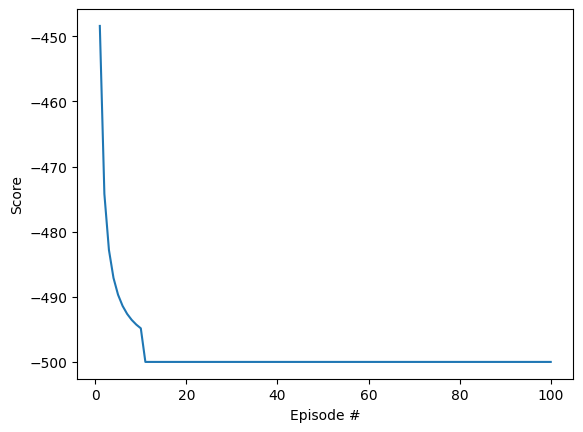

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()